Plot out all of the indices, figure out which files are in error (counting across ensembles, not per ensemble), pick one or two to include in Jack's paper.

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
from matplotlib import cm
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil

#GeoCAT Specific packages
from geocat.viz import util as gvutil

In [3]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

import os
import glob
import re

In [4]:
# setting for significance hatches
plt.rcParams['hatch.linewidth'] = 0.75
plt.rcParams['hatch.color'] = 'darkgrey'

In [5]:
iDir = "/glade/work/maritye/Data/ARISE-MCB/ETCCDI/"
inSSP = '/glade/work/maritye/Data/ARISE-SAI/ETCCDI/SSP245/'
oDir = '/glade/work/maritye/Data/ARISE-MCB/ETCCDI/Anomalies/'

varnam = ['PRECT', 'TREFHTMX', 'TREFHTMN']

In [6]:
pindices = ['CDD','CWD','RX1D','N95','N99','R20mm','RX5D','PRCPTOT', 'SDII','R10mm'] # something funny with P95 and P99 ignore these 2 for MCB runs
txindices = ['TXX',  'TXN', 'TX10', 'TX90'] #calculated the fixed threshold indices but they aren't very meaningful at a global scale so not including in paper or significance tests.
tnindices = ['TNX', 'TNN', 'TN10', 'TN90']

Open original files and check mean value during 2050-2069. If they're weird, don't create plot from the anomalies.

In [12]:
# Temperature
with xr.open_dataset(os.path.join((iDir + varnam[1]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + txindices[0] + '.2035-2069.nc'))) as ds:
    txx = ds[txindices[0]].sel(year=slice('2050','2069')).mean(['member', 'year'])
    
with xr.open_dataset(os.path.join((iDir + varnam[1]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + txindices[1] + '.2035-2069.nc'))) as ds:
    txn = ds[txindices[1]].sel(year=slice('2050','2069')).mean(['member', 'year'])

with xr.open_dataset(os.path.join((iDir + varnam[1]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + txindices[2] + '.2035-2069.nc'))) as ds:
    tx10 = ds[txindices[2]].sel(year=slice('2050','2069')).mean(['member', 'year'])
    
with xr.open_dataset(os.path.join((iDir + varnam[1]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + txindices[3] + '.2035-2069.nc'))) as ds:
    tx90 = ds[txindices[3]].sel(year=slice('2050','2069')).mean(['member', 'year'])
    
with xr.open_dataset(os.path.join((iDir + varnam[2]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + tnindices[0] + '.2035-2069.nc'))) as ds:
    tnx = ds[tnindices[0]].sel(year=slice('2050','2069')).mean(['member', 'year'])
    
with xr.open_dataset(os.path.join((iDir + varnam[2]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + tnindices[1] + '.2035-2069.nc'))) as ds:
    tnn = ds[tnindices[1]].sel(year=slice('2050','2069')).mean(['member', 'year'])

with xr.open_dataset(os.path.join((iDir + varnam[2]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + tnindices[2] + '.2035-2069.nc'))) as ds:
    tn10 = ds[tnindices[2]].sel(year=slice('2050','2069')).mean(['member', 'year'])
    
with xr.open_dataset(os.path.join((iDir + varnam[2]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + tnindices[3] + '.2035-2069.nc'))) as ds:
    tn90 = ds[tnindices[3]].sel(year=slice('2050','2069')).mean(['member', 'year'])
    

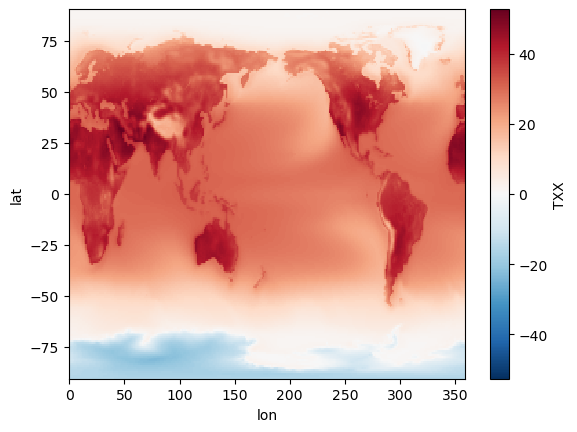

In [13]:
txx.plot();

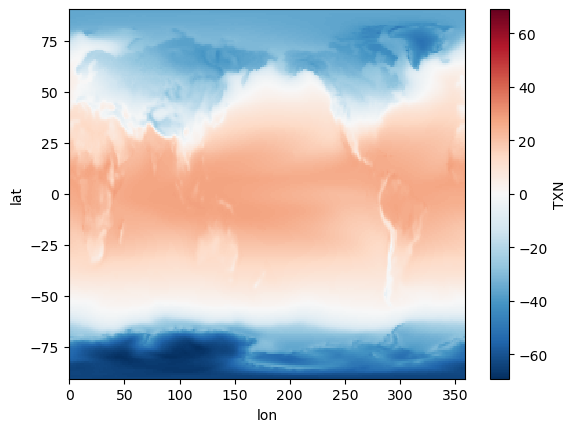

In [14]:
txn.plot();

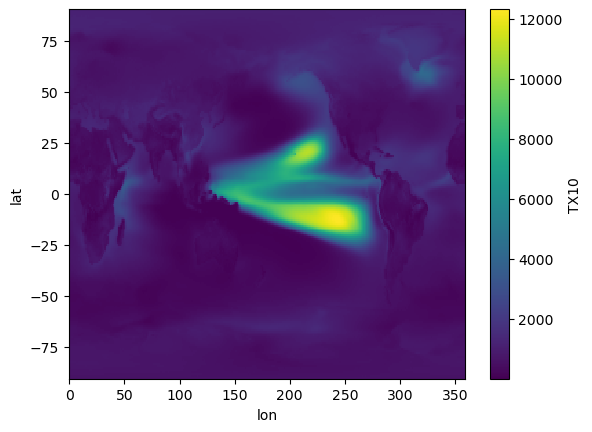

In [16]:
tx10.plot(); # DROP

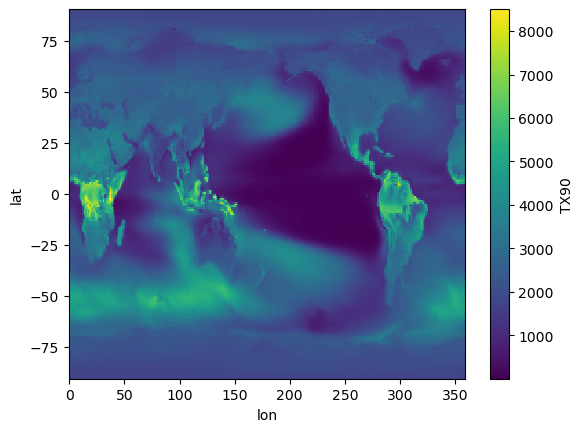

In [18]:
tx90.plot(); #DROP

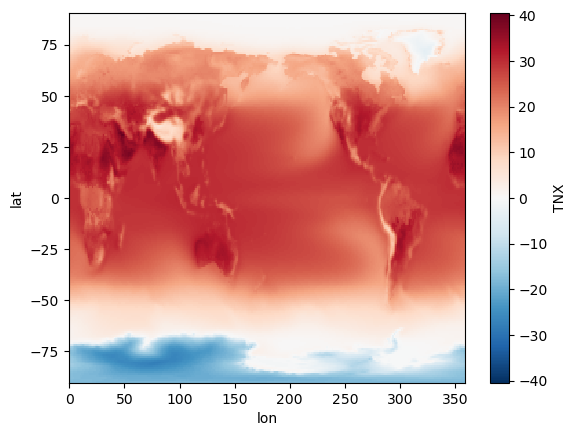

In [19]:
tnx.plot();

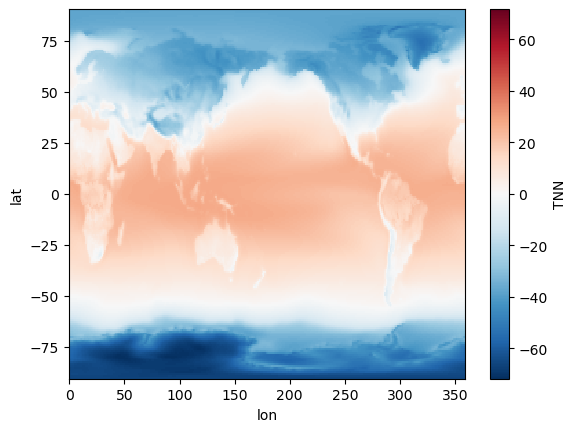

In [20]:
tnn.plot();

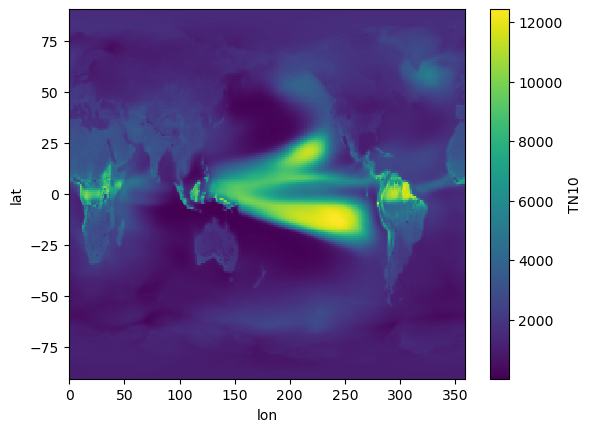

In [21]:
tn10.plot(); #DROP

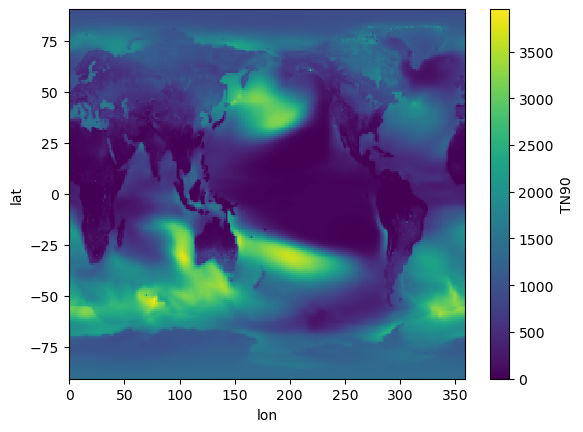

In [22]:
tn90.plot(); #DROP

Precipitation

In [23]:
with xr.open_dataset(os.path.join((iDir + varnam[0]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + pindices[0] + '.2035-2069.nc'))) as ds:
    cdd = ds[pindices[0]].sel(year=slice('2050','2069')).mean(['member', 'year'])

with xr.open_dataset(os.path.join((iDir + varnam[0]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + pindices[1] + '.2035-2069.nc'))) as ds:
    cwd = ds[pindices[1]].sel(year=slice('2050','2069')).mean(['member', 'year'])

with xr.open_dataset(os.path.join((iDir + varnam[0]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + pindices[2] + '.2035-2069.nc'))) as ds:
    rx1 = ds[pindices[2]].sel(year=slice('2050','2069')).mean(['member', 'year'])

with xr.open_dataset(os.path.join((iDir + varnam[0]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + pindices[3] + '.2035-2069.nc'))) as ds:
    n95 = ds[pindices[3]].sel(year=slice('2050','2069')).mean(['member', 'year'])

with xr.open_dataset(os.path.join((iDir + varnam[0]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + pindices[4] + '.2035-2069.nc'))) as ds:
    n99 = ds[pindices[4]].sel(year=slice('2050','2069')).mean(['member', 'year'])

with xr.open_dataset(os.path.join((iDir + varnam[0]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + pindices[5] + '.2035-2069.nc'))) as ds:
    r20 = ds[pindices[5]].sel(year=slice('2050','2069')).mean(['member', 'year'])

with xr.open_dataset(os.path.join((iDir + varnam[0]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + pindices[6] + '.2035-2069.nc'))) as ds:
    rx5 = ds[pindices[6]].sel(year=slice('2050','2069')).mean(['member', 'year'])

with xr.open_dataset(os.path.join((iDir + varnam[0]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + pindices[7] + '.2035-2069.nc'))) as ds:
    ptot = ds[pindices[7]].sel(year=slice('2050','2069')).mean(['member', 'year'])

with xr.open_dataset(os.path.join((iDir + varnam[0]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + pindices[8] + '.2035-2069.nc'))) as ds:
    sdii = ds[pindices[8]].sel(year=slice('2050','2069')).mean(['member', 'year'])

with xr.open_dataset(os.path.join((iDir + varnam[0]), ('b.e21.BSSP245smbb.f09_g17.MCB-050PCT.001-010.cam.h1.' + pindices[9] + '.2035-2069.nc'))) as ds:
    r10 = ds[pindices[9]].sel(year=slice('2050','2069')).mean(['member', 'year'])


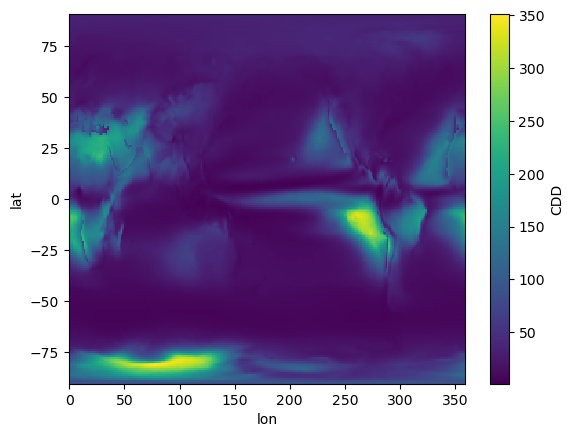

In [24]:
cdd.plot(); #DROP?

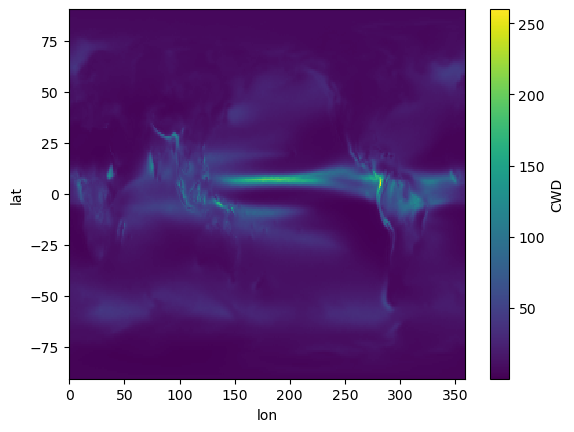

In [25]:
cwd.plot();

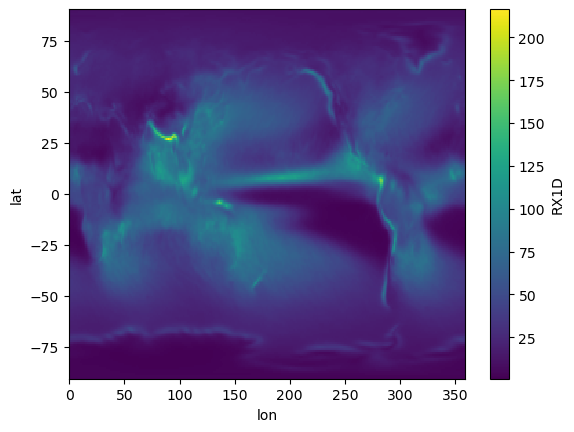

In [27]:
rx1.plot();

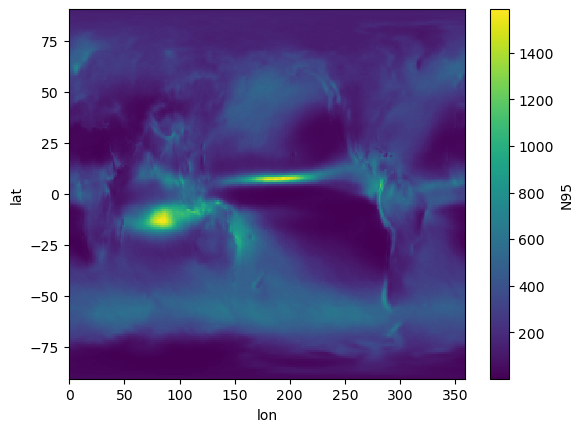

In [29]:
n95.plot(); #DROP

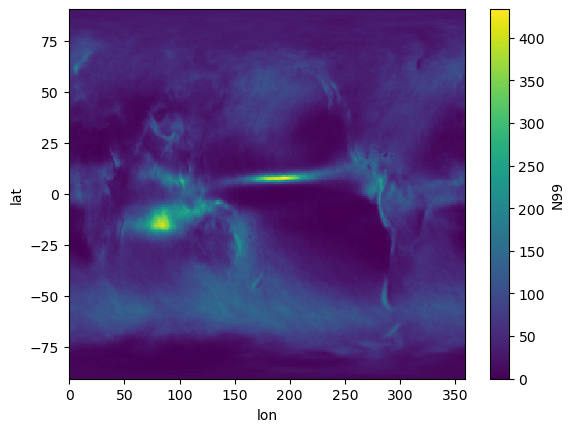

In [30]:
n99.plot(); #DROP

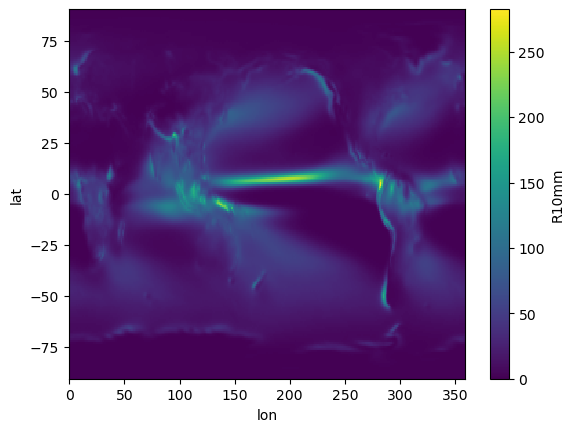

In [31]:
r10.plot();

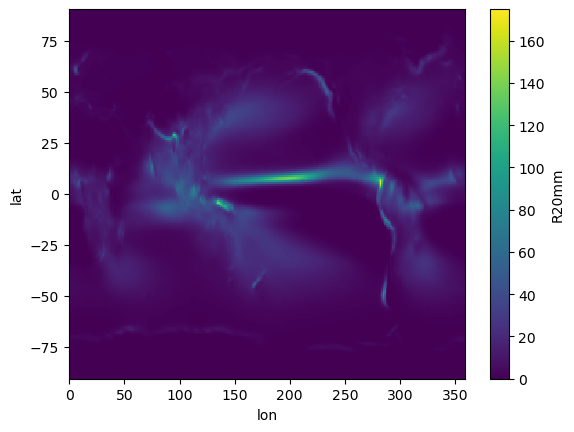

In [32]:
r20.plot();

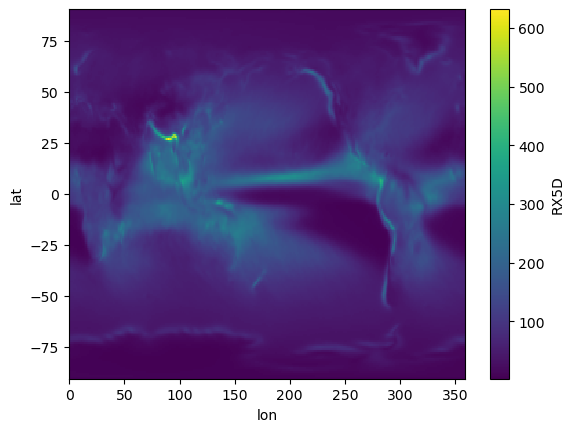

In [33]:
rx5.plot();

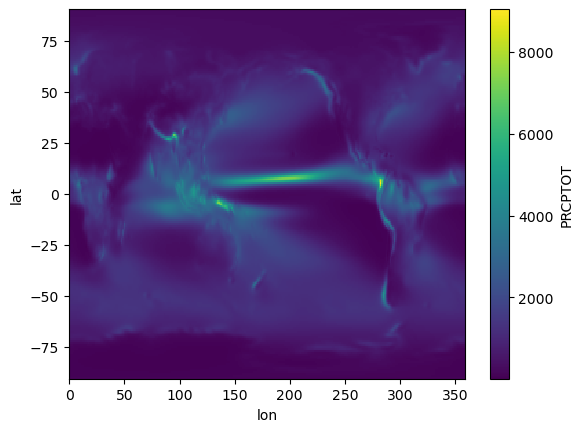

In [34]:
ptot.plot();

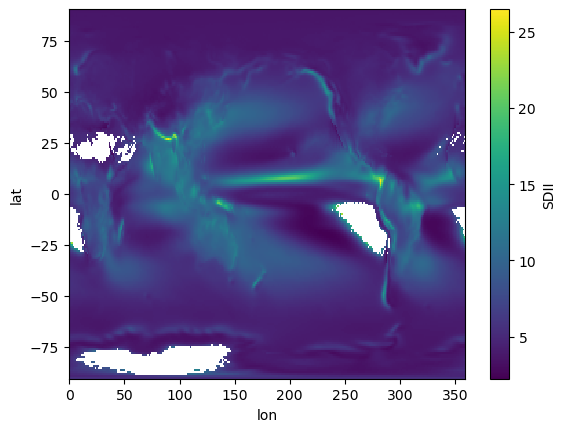

In [36]:
sdii.plot(); #DROP. Is there a problem with count of wet days?

### Make Plots for Paper

Make plots of TXX, TXN, TNN, TNX, RX1D only.

Read in the anomaly and significance files, set the longitude to include 360 to avoid white line in center

In [6]:
# Ensure longitudes range from 0 to 360 degrees
with xr.open_dataset('/glade/work/maritye/Data/ARISE-MCB/ETCCDI/Anomalies_Significances_2060_TXX.nc') as dtx:
    txx_ssp  = gvutil.xr_add_cyclic_longitudes(dtx.SSP_TXX,  "lon").squeeze()
    txx  = gvutil.xr_add_cyclic_longitudes(dtx.MCB_TXX,  "lon").squeeze()
    stxx  = gvutil.xr_add_cyclic_longitudes(dtx.pval_mcb,  "lon").squeeze()
    stxx_ssp = gvutil.xr_add_cyclic_longitudes(dtx.pval_ssp, 'lon').squeeze()

with xr.open_dataset('/glade/work/maritye/Data/ARISE-MCB/ETCCDI/Anomalies_Significances_2060_TXN.nc') as dtxn:
    txn  = gvutil.xr_add_cyclic_longitudes(dtxn.MCB_TXN,  "lon").squeeze()
    txn_ssp  = gvutil.xr_add_cyclic_longitudes(dtxn.SSP_TXN,  "lon").squeeze()
    stxn  = gvutil.xr_add_cyclic_longitudes(dtxn.pval_mcb,  "lon").squeeze()
    stxn_ssp = gvutil.xr_add_cyclic_longitudes(dtxn.pval_ssp, 'lon').squeeze()


with xr.open_dataset('/glade/work/maritye/Data/ARISE-MCB/ETCCDI/Anomalies_Significances_2060_TNN.nc') as dtn:
    dtn = dtn.mean('members')
    tnn  = gvutil.xr_add_cyclic_longitudes(dtn.MCB_TXN,  "lon").squeeze()
    tnn_ssp  = gvutil.xr_add_cyclic_longitudes(dtn.SSP_TXN,  "lon").squeeze()
    stnn  = gvutil.xr_add_cyclic_longitudes(dtn.pval_mcb,  "lon").squeeze()
    stnn_ssp = gvutil.xr_add_cyclic_longitudes(dtn.pval_ssp, 'lon').squeeze()
    
with xr.open_dataset('/glade/work/maritye/Data/ARISE-MCB/ETCCDI/Anomalies_Significances_2060_TNX.nc') as dtnx:
    dtnx = dtnx.mean('members')
    tnx  = gvutil.xr_add_cyclic_longitudes(dtnx.MCB_TXX,  "lon").squeeze()
    tnx_ssp  = gvutil.xr_add_cyclic_longitudes(dtnx.SSP_TXX,  "lon").squeeze()
    stnx  = gvutil.xr_add_cyclic_longitudes(dtnx.pval_mcb,  "lon").squeeze()
    stnx_ssp = gvutil.xr_add_cyclic_longitudes(dtnx.pval_ssp, 'lon').squeeze()
    
with xr.open_dataset('/glade/work/maritye/Data/ARISE-MCB/ETCCDI/Anomalies_Significances_2060_RX1D.nc') as drx:
    rx  = gvutil.xr_add_cyclic_longitudes(drx.MCB_RX1D,  "lon").squeeze()
    rx_ssp  = gvutil.xr_add_cyclic_longitudes(drx.SSP_RX1D,  "lon").squeeze()
    srx  = gvutil.xr_add_cyclic_longitudes(drx.pval_mcb,  "lon").squeeze()
    srx_ssp = gvutil.xr_add_cyclic_longitudes(drx.pval_ssp, 'lon').squeeze()


In [7]:
# Difference between MCB and SSP end of century
txx_delta = txx - txx_ssp
txn_delta = txn - txn_ssp
tnn_delta = tnn - tnn_ssp
tnx_delta = tnx - tnx_ssp

# Compare End of Runs (2050-2069) for ARISE MCB and SSP 2-4.5

Anomalies from the base period of SSP 2-4.5 (2020-3039)

Plotting maxima and minima on same plot


* Row 1 Coldest Day  TXn  
* Row 2 Hottest Day TXx  
* Row 3 Coldest Night TNn  
* Row 4 Hottest Night TNx  


In [38]:
# Test with only one figure to change color bar
# -----------

min_v = -5.5; max_v = 5.5

#--------#-----------#--------------# set a blue white red colour bar
blues = cm.Blues_r(np.linspace(0,1, num=20))
whites = cm.Greys(np.zeros(3))
reds = cm.Reds(np.linspace(0,1,num=20))
colors=np.vstack((blues, whites, reds))
mari_bwr = mcolors.LinearSegmentedColormap.from_list('matlab_bwr',colors)

matlab_bwr = mpl.colormaps['bwr'].resampled(41)

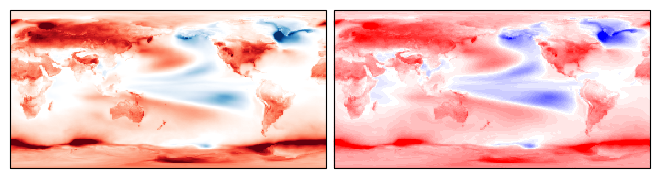

In [39]:
# ----------- # ----------- # ----------- # ----------- figure start

fig = plt.figure()

proj = ccrs.PlateCarree()
grid = gridspec.GridSpec(nrows=1, ncols=2, figure=fig, left=0., right=1., top=1., bottom=0.,
                         wspace=0.025, hspace=0.05,)

proj = ccrs.PlateCarree()

ax11 = fig.add_subplot(grid[0], projection=ccrs.PlateCarree(central_longitude=180)) #MCB- base
ax12 = fig.add_subplot(grid[1], projection=ccrs.PlateCarree(central_longitude=180)) #MCB- base

# ----------- plots

ax11.pcolormesh(txn['lon'], txn['lat'], txn.data, cmap=mari_bwr, vmin=min_v, vmax=max_v, transform=proj)
ax12.pcolormesh(txn['lon'], txn['lat'], txn.data, cmap=matlab_bwr, vmin=min_v, vmax=max_v, transform=proj)

# ----------- colorbar
"""
cax = fig.add_axes([0.25, -0.015, 0.5, 0.025])
cbar_ = plt.colorbar(ax11, orientation='horizontal', cax=cax)
cbar_.ax.tick_params(labelsize=12)
"""
plt.show()

Use the 41 segment blue_white_red to match Jack's figures.

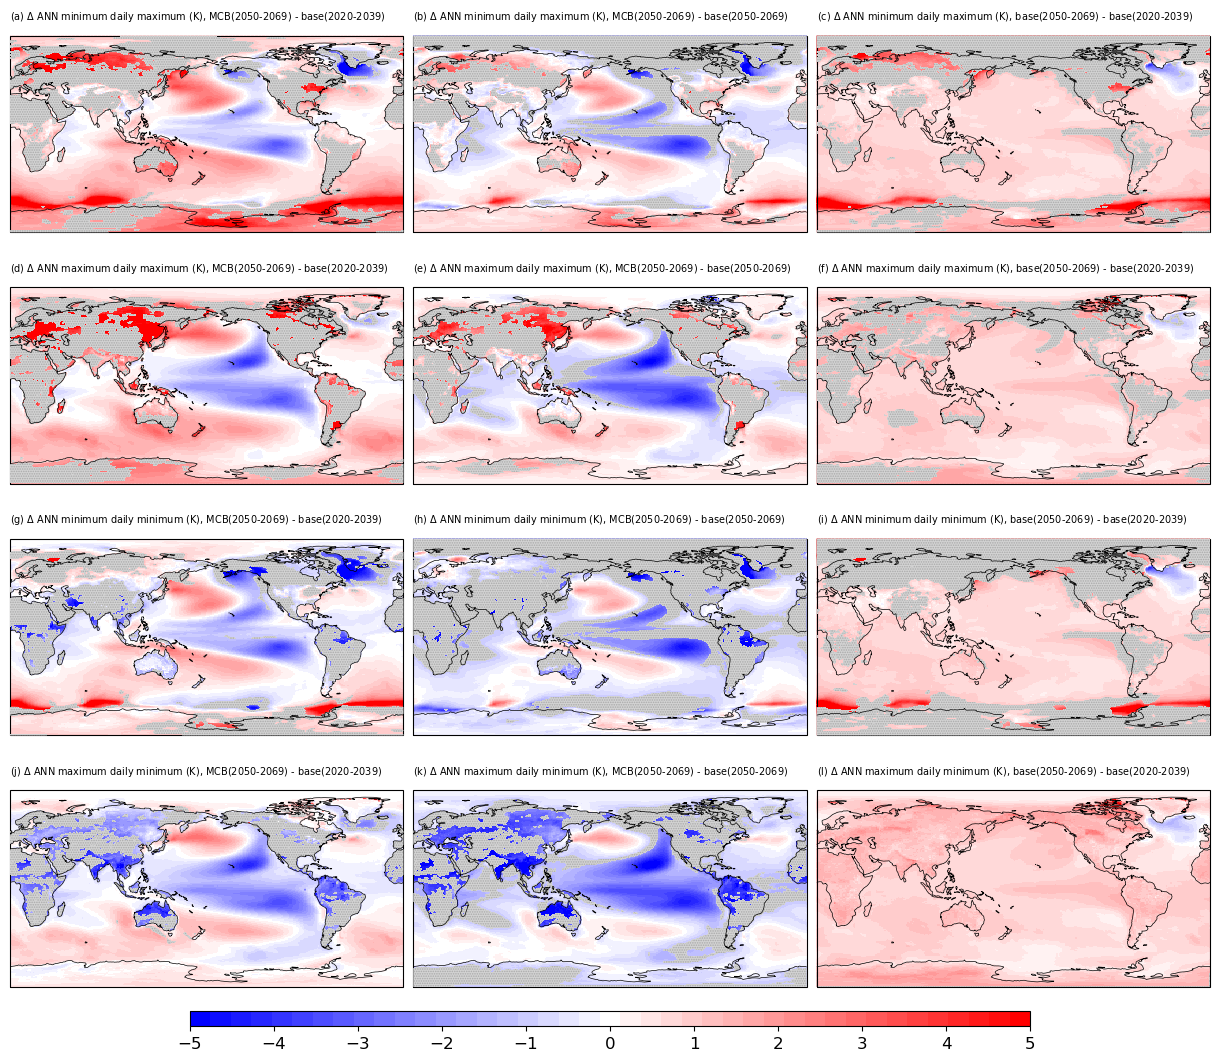

In [45]:
# -----------

min_v = -5; max_v = 5
cmap = mpl.colormaps['bwr'].resampled(41)

# ----------- # ----------- # ----------- # ----------- figure start

fig = plt.figure(figsize=(12, 10))

grid = gridspec.GridSpec(nrows=4, ncols=3, figure=fig, left=0., right=1., top=1., bottom=0.,
                         wspace=0.025, hspace=0.025,)

proj = ccrs.PlateCarree()

ax11 = fig.add_subplot(grid[0], projection=ccrs.PlateCarree(central_longitude=180)) #MCB- base
ax12 = fig.add_subplot(grid[1], projection=ccrs.PlateCarree(central_longitude=180)) #MCB-SSP
ax13 = fig.add_subplot(grid[2], projection=ccrs.PlateCarree(central_longitude=180)) #SSP-base
ax14 = fig.add_subplot(grid[3], projection=ccrs.PlateCarree(central_longitude=180)) 
ax15 = fig.add_subplot(grid[4], projection=ccrs.PlateCarree(central_longitude=180)) 
ax16 = fig.add_subplot(grid[5], projection=ccrs.PlateCarree(central_longitude=180)) 

ax1 = fig.add_subplot(grid[6], projection=ccrs.PlateCarree(central_longitude=180)) #MCB- base
ax2 = fig.add_subplot(grid[7], projection=ccrs.PlateCarree(central_longitude=180)) #MCB-SSP
ax3 = fig.add_subplot(grid[8], projection=ccrs.PlateCarree(central_longitude=180)) #SSP-base
ax4 = fig.add_subplot(grid[9], projection=ccrs.PlateCarree(central_longitude=180)) 
ax5 = fig.add_subplot(grid[10], projection=ccrs.PlateCarree(central_longitude=180)) 
ax6 = fig.add_subplot(grid[11], projection=ccrs.PlateCarree(central_longitude=180)) 


ax1.coastlines(linewidth=0.5, zorder=10)
ax2.coastlines(linewidth=0.5, zorder=10)
ax3.coastlines(linewidth=0.5, zorder=10)
ax4.coastlines(linewidth=0.5, zorder=10)
ax5.coastlines(linewidth=0.5, zorder=10)
ax6.coastlines(linewidth=0.5, zorder=10)

ax11.coastlines(linewidth=0.5, zorder=10)
ax12.coastlines(linewidth=0.5, zorder=10)
ax13.coastlines(linewidth=0.5, zorder=10)
ax14.coastlines(linewidth=0.5, zorder=10)
ax15.coastlines(linewidth=0.5, zorder=10)
ax16.coastlines(linewidth=0.5, zorder=10)


# --------------------significance hatching 

ax11.contourf(txn['lon'], txn['lat'], xr.where(((stxn.data >= 0.05) & ((txn.data >1)|(txn.data<-1))), 1.0, np.nan).data, transform=proj,
             colors='lightgray', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax11.set_global()

ax12.contourf(txn['lon'], txn['lat'], xr.where(((stxn.data >= 0.05) & ((txn_delta.data >1)|(txn_delta.data<-1))), 1.0, np.nan).data, transform=proj, #uses the MCB significances as very similar
             colors='lightgray', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax12.set_global()

ax13.contourf(txn_ssp['lon'], txn_ssp['lat'], xr.where(((stxn.data >= 0.05) & ((txn_ssp.data >1)|(txn_ssp.data<-1))), 1.0, np.nan).data, transform=proj, 
             colors='lightgray', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax13.set_global() 


ax14.contourf(txx['lon'], txx['lat'], xr.where(((stxx.data >= 0.05) & ((txx.data >1)|(txx.data<-1))), 1.0, np.nan).data, transform=proj, 
             colors='lightgray', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax14.set_global() 

ax15.contourf(txx['lon'], txx['lat'], xr.where(((stxx.data >= 0.05) & ((txx_delta.data >1)|(txx_delta.data<-1))), 1.0, np.nan).data, transform=proj, 
             colors='lightgray', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax15.set_global() 

ax16.contourf(txx_ssp['lon'], txx_ssp['lat'], xr.where(((stxx.data >= 0.05) & ((txx_ssp.data >1)|(txx_ssp.data<-1))), 1.0, np.nan).data, transform=proj, 
             colors='lightgray', levels=[1.0, 1.5],       
             hatches=['.......'],
             zorder=5,)
ax16.set_global() 

ax1.contourf(tnn['lon'], tnn['lat'], xr.where(((stnn.data >= 0.05) & ((tnn.data >1)|(tnn.data<-1))), 1.0, np.nan).data, transform=proj,
             colors='lightgray', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax1.set_global()

ax2.contourf(tnn['lon'], tnn['lat'], xr.where(((stxn.data >= 0.05) & ((tnn_delta.data >1)|(tnn_delta.data<-1))), 1.0, np.nan).data, transform=proj, #uses the MCB significances as very similar
             colors='lightgray', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax2.set_global()

ax3.contourf(tnn_ssp['lon'], tnn_ssp['lat'], xr.where(((stnn.data >= 0.05) & ((tnn_ssp.data >1)|(tnn_ssp.data<-1))), 1.0, np.nan).data, transform=proj, 
             colors='lightgray', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax3.set_global() 


ax4.contourf(tnx['lon'], tnx['lat'], xr.where(((stnx.data >= 0.05) & ((tnx.data >1)|(tnx.data<-1))), 1.0, np.nan).data, transform=proj, 
             colors='lightgray', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax4.set_global() 

ax5.contourf(tnx['lon'], tnx['lat'], xr.where(((stnx.data >= 0.05) & ((tnx_delta.data >1)|(tnx_delta.data<-1))), 1.0, np.nan).data, transform=proj, 
             colors='lightgray', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax5.set_global() 

ax6.contourf(tnx_ssp['lon'], tnx_ssp['lat'], xr.where(((stnx_ssp.data >= 0.05) & ((tnx_ssp.data >1)|(tnx_ssp.data<-1))), 1.0, np.nan).data, transform=proj, 
             colors='lightgray', levels=[1.0, 1.5],       
             hatches=['.......'],
             zorder=1,)
ax6.set_global() 

# ----------- plots

ax11.pcolormesh(txn['lon'], txn['lat'], txn.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)
ax12.pcolormesh(txn_delta['lon'], txn_delta['lat'], txn_delta.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)
ax13.pcolormesh(txn_ssp['lon'], txn_ssp['lat'], txn_ssp.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)

ax14.pcolormesh(txx['lon'], txx['lat'], txx.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)
ax15.pcolormesh(txx_delta['lon'], txx_delta['lat'], txx_delta.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)
ax16.pcolormesh(txx_ssp['lon'], txx_ssp['lat'], txx_ssp.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)

ax1.pcolormesh(tnn['lon'], tnn['lat'], tnn.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)
ax2.pcolormesh(tnn_delta['lon'], tnn_delta['lat'], tnn_delta.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)
ax3.pcolormesh(tnn_ssp['lon'], tnn_ssp['lat'], tnn_ssp.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)

ax4.pcolormesh(tnx['lon'], tnx['lat'], tnx.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)
ax5.pcolormesh(tnx_delta['lon'], tnx_delta['lat'], tnx_delta.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)
pl= ax6.pcolormesh(tnx_ssp['lon'], tnx_ssp['lat'], tnx_ssp.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)

# ----------- titles

gvutil.set_titles_and_labels(ax11, lefttitle="(a) $\Delta$ ANN minimum daily maximum (K), MCB(2050-2069) - base(2020-2039)", 
                             lefttitlefontsize=7
                            )
gvutil.set_titles_and_labels(ax12, lefttitle="(b) $\Delta$ ANN minimum daily maximum (K), MCB(2050-2069) - base(2050-2069)", 
                             lefttitlefontsize=7) 
gvutil.set_titles_and_labels(ax13, lefttitle="(c) $\Delta$ ANN minimum daily maximum (K), base(2050-2069) - base(2020-2039)", 
                             lefttitlefontsize=7, )

gvutil.set_titles_and_labels(ax14, lefttitle="(d) $\Delta$ ANN maximum daily maximum (K), MCB(2050-2069) - base(2020-2039)", 
                             lefttitlefontsize=7
                            )
gvutil.set_titles_and_labels(ax15, lefttitle="(e) $\Delta$ ANN maximum daily maximum (K), MCB(2050-2069) - base(2050-2069)", 
                             lefttitlefontsize=7) 
gvutil.set_titles_and_labels(ax16, lefttitle="(f) $\Delta$ ANN maximum daily maximum (K), base(2050-2069) - base(2020-2039)", 
                             lefttitlefontsize=7, )

gvutil.set_titles_and_labels(ax1, lefttitle="(g) $\Delta$ ANN minimum daily minimum (K), MCB(2050-2069) - base(2020-2039)", 
                             lefttitlefontsize=7
                            )
gvutil.set_titles_and_labels(ax2, lefttitle="(h) $\Delta$ ANN minimum daily minimum (K), MCB(2050-2069) - base(2050-2069)", 
                             lefttitlefontsize=7) 
gvutil.set_titles_and_labels(ax3, lefttitle="(i) $\Delta$ ANN minimum daily minimum (K), base(2050-2069) - base(2020-2039)", 
                             lefttitlefontsize=7, )

gvutil.set_titles_and_labels(ax4, lefttitle="(j) $\Delta$ ANN maximum daily minimum (K), MCB(2050-2069) - base(2020-2039)", 
                             lefttitlefontsize=7
                            )
gvutil.set_titles_and_labels(ax5, lefttitle="(k) $\Delta$ ANN maximum daily minimum (K), MCB(2050-2069) - base(2050-2069)", 
                             lefttitlefontsize=7) 
gvutil.set_titles_and_labels(ax6, lefttitle="(l) $\Delta$ ANN maximum daily minimum (K), base(2050-2069) - base(2020-2039)", 
                             lefttitlefontsize=7, )

# ----------- colorbar

cax = fig.add_axes([0.15, -0.015, 0.7, 0.015])
cbar_ = plt.colorbar(pl, orientation='horizontal', cax=cax)
cbar_.set_ticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
cbar_.ax.tick_params(labelsize=12)

plt.savefig('/glade/work/maritye/Data/ARISE-MCB/Figures/Fig7_2060Anoms_tempmaxmin.png', bbox_inches='tight')
plt.show()
plt.close()

## Daily Temperature Minima

### Coldest Night, Hottest Night (TNn, TNx)

## Wettest day

In [47]:
rx_delta= rx - rx_ssp

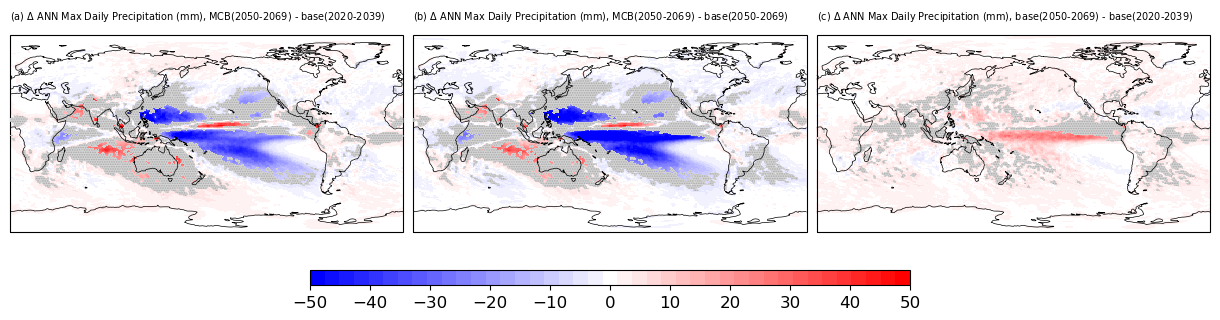

In [51]:
# -----------

min_v = -50; max_v = 50

# -----------

cmap = mpl.colormaps['bwr'].resampled(41)

# ----------- # ----------- # ----------- # ----------- figure start

fig = plt.figure(figsize=(12, 3))

grid = gridspec.GridSpec(nrows=1, ncols=3, figure=fig, left=0., right=1., top=1., bottom=0.,
                         wspace=0.025, hspace=0.025,)

proj = ccrs.PlateCarree()

#### Set coastal and ocean features
ax1 = fig.add_subplot(grid[0], projection=ccrs.PlateCarree(central_longitude=180)) #MCB- base
ax2 = fig.add_subplot(grid[1], projection=ccrs.PlateCarree(central_longitude=180)) #MCB-SSP
ax3 = fig.add_subplot(grid[2], projection=ccrs.PlateCarree(central_longitude=180)) #SSP-base

ax1.coastlines(linewidth=0.5, zorder=10)
ax2.coastlines(linewidth=0.5, zorder=10)
ax3.coastlines(linewidth=0.5, zorder=10)

#----------- significance hatching

ax1.contourf(rx['lon'], rx['lat'], xr.where(((srx.data >= 0.05) & ((rx.data >5)|(rx.data<-5))), 1.0, np.nan).data, transform=proj,
             colors='lightgrey', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax1.set_global()

ax2.contourf(rx_delta['lon'], rx_delta['lat'], xr.where(((srx.data >= 0.05) & ((rx_delta.data >5)|(rx_delta.data <-5))), 1.0, np.nan).data, transform=proj, #uses the MCB significances as very similar
             colors='lightgrey', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax2.set_global()
ax3.contourf(rx_ssp['lon'], rx_ssp['lat'], xr.where(((srx.data >= 0.05) & ((rx_ssp.data >5)|(rx_ssp.data < -5))), 1.0, np.nan).data, transform=proj, 
             colors='lightgrey', levels=[1.0, 1.5],       
             hatches=['.......'], 
             zorder=5,)
ax3.set_global() 


# ----------- plots

ax1.pcolormesh(rx['lon'], rx['lat'], rx.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)
ax2.pcolormesh(rx_delta['lon'], rx_delta['lat'], rx_delta.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)
pl= ax3.pcolormesh(rx_ssp['lon'], rx_ssp['lat'], rx_ssp.data, cmap=cmap, vmin=min_v, vmax=max_v, transform=proj)

# ----------- titles

gvutil.set_titles_and_labels(ax1, lefttitle="(a) $\Delta$ ANN Max Daily Precipitation (mm), MCB(2050-2069) - base(2020-2039)", 
                             lefttitlefontsize=7
                            )
gvutil.set_titles_and_labels(ax2, lefttitle="(b) $\Delta$ ANN Max Daily Precipitation (mm), MCB(2050-2069) - base(2050-2069)", 
                             lefttitlefontsize=7) 
gvutil.set_titles_and_labels(ax3, lefttitle="(c) $\Delta$ ANN Max Daily Precipitation (mm), base(2050-2069) - base(2020-2039)", 
                             lefttitlefontsize=7, )


# ----------- colorbar
cax = fig.add_axes([0.25, -0.005, 0.5, 0.05])
cbar_ = plt.colorbar(pl, orientation='horizontal', cax=cax)
cbar_.set_ticks([-50,-40,-30,-20,-10,0,10,20,30,40,50])
cbar_.ax.tick_params(labelsize=12)

# ----------- save fig

plt.savefig('/glade/work/maritye/Data/ARISE-MCB/Figures/Fig8_2060Anoms_RX1D.png', bbox_inches='tight')
plt.show()
plt.close()

# -----------